In [2]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

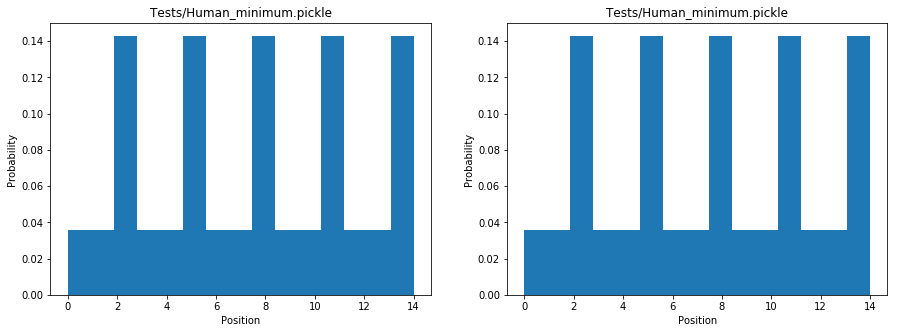

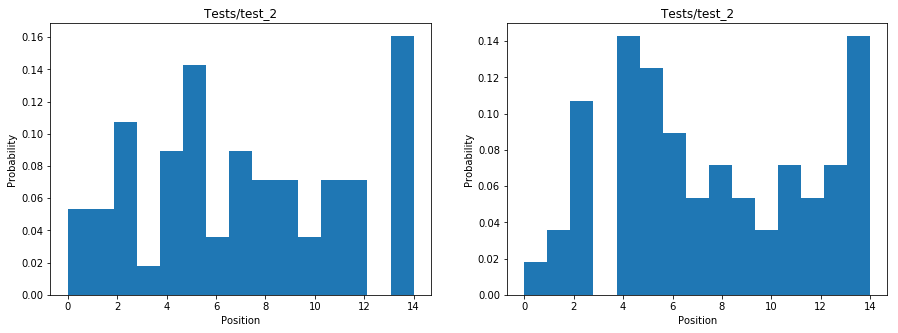

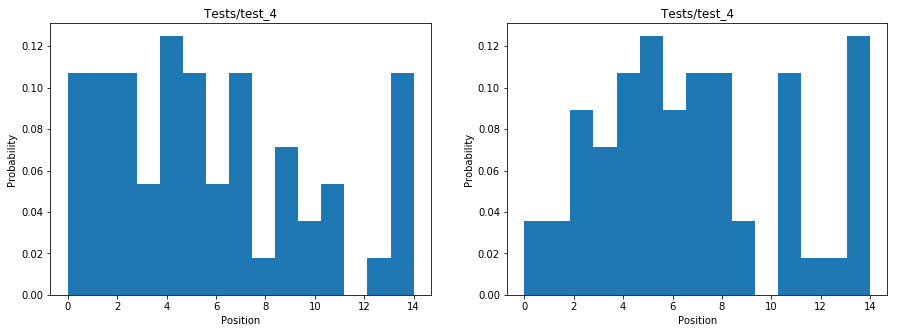

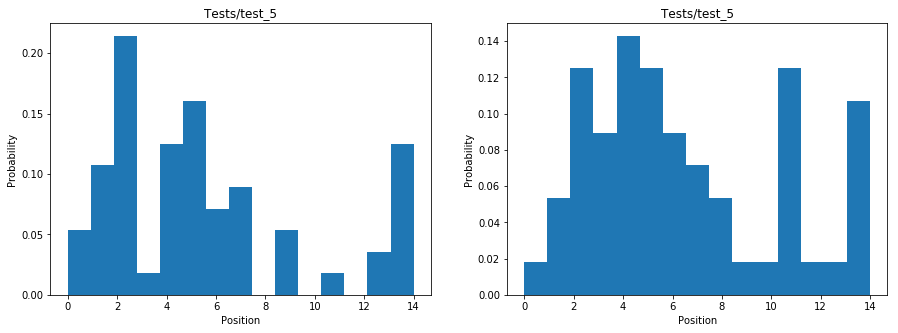

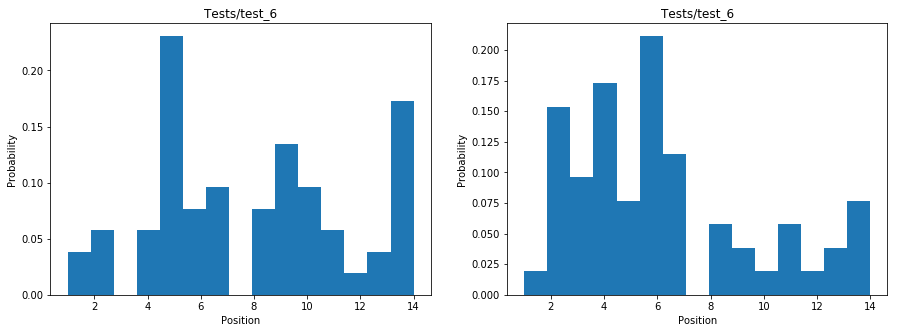

In [3]:
filenames = ["Tests/Human_minimum.pickle","Tests/test_2", "Tests/test_4", "Tests/test_5", "Tests/test_6"]
for file_name in filenames:
    fileObject = open(file_name,'rb')  
    all_selected = pickle.load(fileObject)

    fig = plt.figure()
    fig.set_figheight(5)
    fig.set_figwidth(15)

    num = [x[1] for x in all_selected[0]]
    plt.subplot(1, 2, 1)
    plt.hist(num, density=True, bins=15)
    plt.title(file_name)
    plt.xlabel('Position')
    plt.ylabel('Probability')

    num = [x[1] for x in all_selected[1]]
    plt.subplot(1, 2, 2)
    plt.hist(num, density=True, bins=15)
    plt.title(file_name)
    plt.xlabel('Position')
    plt.ylabel('Probability')

    plt.show()

    fileObject.close()

[18.0, 29.0]
[18.0, 32.0]
[15.0, 24.0]
[15.0, 17.0]


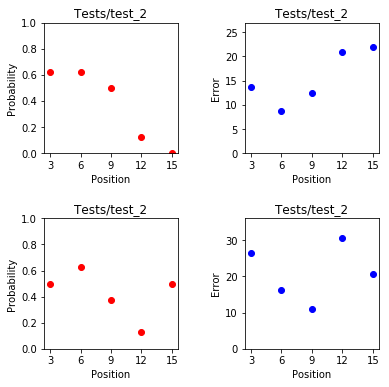

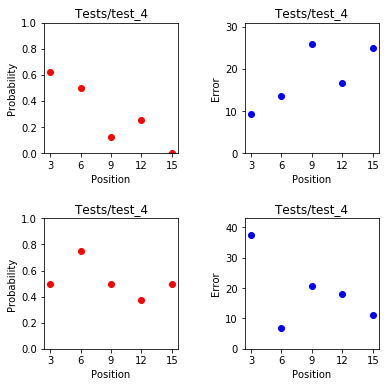

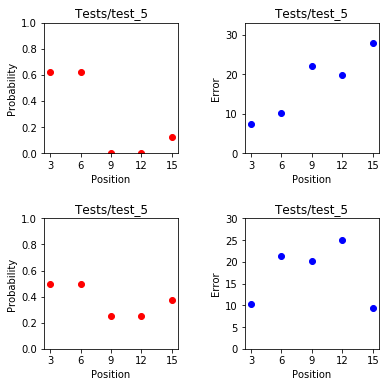

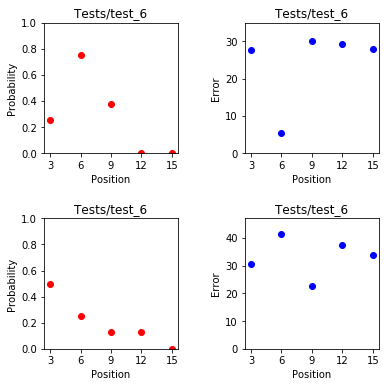

In [5]:
fileObject = open("Tests/Human_minimum.pickle",'rb')  
minima = pickle.load(fileObject)
fileObject.close()

data_correct =[]
    
for i in range (len(all_selected)):
    temp_data_correct = np.zeros(15)
    for j in range (len(all_selected[i])):
        temp_data_correct[minima[i][j][1]] += 1

    data_correct.append(temp_data_correct)

filenames = ["Tests/test_2", "Tests/test_4", "Tests/test_5", "Tests/test_6"]
for file_name in filenames:
    fileObject = open(file_name,'rb')  
    all_selected = pickle.load(fileObject)
    fileObject.close()
    
    indices = [2, 5, 8, 11, 14]
    plot = []
    add = []
    for i in range (len(all_selected)):
        temp_correct = np.zeros(15)
        temp_error = np.zeros(15)
        
        for j in range (len(all_selected[i])):
            if all_selected[i][j] == minima[i][j]:
                temp_correct[minima[i][j][1]] += 1
            
            temp_error[minima[i][j][1]] += np.abs(all_selected[i][j][0] - minima[i][j][0])
            
        add.append(np.sum(temp_correct))
        temp_error = np.true_divide(temp_error, data_correct)
        temp_correct = np.true_divide(temp_correct, data_correct)        
        plot.append(np.take(temp_correct, indices))
        plot.append(np.take(temp_error, indices))
    
    fig = plt.figure()
    fig.set_figheight(6)
    fig.set_figwidth(6)
    print(add)
    j = 0;
    for num in plot:
        y_pos = np.arange(len(num))
        j += 1
        plt.subplot(2, 2, j)
        plt.subplots_adjust(wspace=0.5, hspace=0.5)
        plt.plot(y_pos, num, 'ro' if j == 1 or j == 3 else 'bo')
        plt.title(file_name)
        plt.ylim([0, 1 if j == 1 or j == 3 else np.ceil(np.max(num)) + 5])     
        plt.xticks(np.arange(5), ('3', '6', '9', '12', '15'))
        #plt.xlim([-1,15])
        plt.xlabel('Position')
        plt.grid(which='minor')
        plt.ylabel('Probability' if j == 1 or j == 3 else 'Error')